

## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

- 
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1} 
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- a) Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- b) Estudiar la convergencia de la serie para los tres casos.
- c) Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función 
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- d) Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página 
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




In [ ]:
#importando todas las librerias
import matplotlib.pylab as plt 
import math as mt
from random import randint
import numpy as np

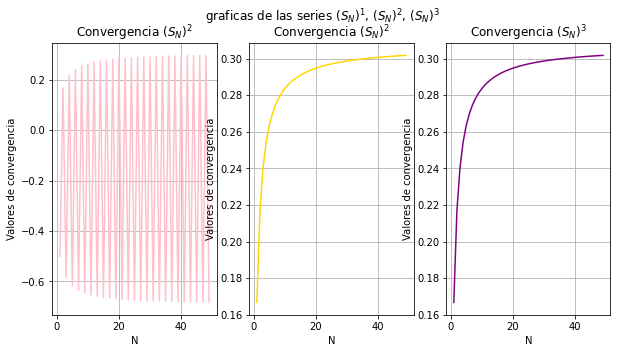

In [ ]:
#a)#########################
def S1(N): #defino la primera serie como una funcion 
  S_N1 = 0
  for n in range(1,N+1):
    x = ((-1)**n)
    y = n/(n+1)
    S_N1 += x*y
  return S_N1
def S2(N):#defino la segunda serie como una funcion
  sh = 0
  sk = 0
  S_N2 = 0
  for n in range(1,N+1):
    h = -(2*n-1)/(2*n)#primera sumatoria
    k = (2*n)/(2*n+1)#segunda sumatoria 
    sh += h
    sk += k
  S_N2 += sh+sk
  return S_N2
def S3(N):#defino la tercera serie como una funcion
   S_N3 = 0
   for n in range(1,N+1):
     a = 1/(2*n*(2*n+1))
     S_N3 += a
   return S_N3

#b) ############################

N_123= np.arange(1,50,1)# graficando 100 puntos con paso 1
#para poder graficar la serie 1 es necesario relizar:
S_N11 = []#creacion de un arreglo para poder gaficar 
for n in N_123:# a cada punto creado arriba le da un valor de la serie
  i = S1(n)
  S_N11.append(i)#introduciendo los valores de la primera sumatoria al arrelo
#usando la misma metodologia que con la serie 1
#serie 2
S_N22 = []
for n in N_123:
  j = S2(n)
  S_N22.append(j)
#usando la misma metodologia que con la serie 1
#serie 3
S_N33 = []
for n in N_123:
  k = S3(n)
  S_N33.append(k)
#creando un subplot para juntar las graficas
#Gráficos de las series
plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace=2)
plt.suptitle('graficas de las series $(S_N)^1$, $(S_N)^2$, $(S_N)^3$')
#graficando la primera serie
plt.subplot(1,3,1)
plt.plot(N_123, S_N11, color="pink")
plt.xlabel("N")
plt.title("Convergencia $(S_N)^2$")
plt.ylabel("Valores de convergencia")
plt.grid()
#graficando la segunda serie
plt.subplot(1,3,2)
plt.plot(N_123, S_N22, color="gold")
plt.title("Convergencia $(S_N)^2$")
plt.xlabel("N")
plt.ylabel("Valores de convergencia")
plt.grid()
#graficando la 3 serie
plt.subplot(1,3,3)
plt.plot(N_123, S_N33, color="purple")
plt.title("Convergencia $(S_N)^3$")
plt.xlabel("N")
plt.ylabel("Valores de convergencia")
plt.grid()
plt.show()

Se puede observar que la serie  $(S_N)^2$ y $(S_N)^3$ son convergentes, sin embargo la serie $(S_N)^1$ es una serie alternante divergente.

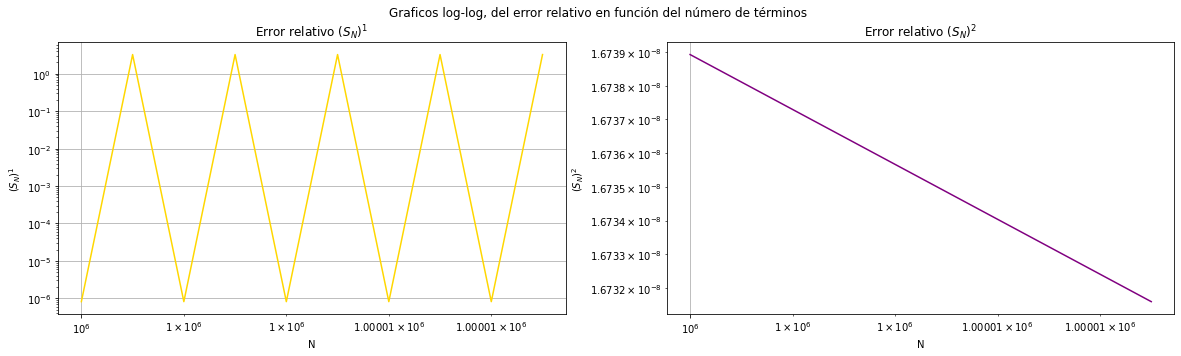

In [ ]:

loglog = np.arange(1000000,1000010,1)#arreglo para crear los puntos a graficar en formato log-log 
error1 = []#creando un arreglo vacio para calcular el error relativo da serie 1 
for i in loglog:
  E1 = np.fabs(S1(i)-S3(i))/S3(i)#valor error relativo dado por el enunciado
  error1.append(E1)#introduciendo los valores del error relativo
#se realiza el mismo proceimiento que en error relativo de la serie 1
error2 = []
for i in loglog:
  E2 = np.fabs(S2(i)-S3(i))/S3(i)
  error2.append(E2)
#graficos de los errores relativos de las series
plt.figure(figsize=(20,5))
plt.subplots_adjust(hspace=2)
plt.suptitle('Graficos log-log, del error relativo en función del número de términos')
# graficando el error relativo de la serie 1 
plt.subplot(1,2,1)
plt.title("Error relativo $(S_N)^1$")
plt.loglog(loglog,error1, color="gold")
plt.xlabel("N")
plt.ylabel("$(S_N)^1$")
plt.grid()
# graficando el error relativo de la serie 2
plt.subplot(1,2,2)
plt.title("Error relativo $(S_N)^2$")
plt.loglog(loglog,error2, color="purple")
plt.xlabel("N")
plt.ylabel("$(S_N)^2$")
plt.grid()
plt.show()

d)
Cuando el error algorítmico gráficamente es decreciente se sabe que la serie converge, por eso en la serie $(S_N)^2$ para la cual graficamos el error en ese punto, se ve que el error decrece de tal manera es posible comprender cómo se comporta el error total. Mientras que en la serie $(S_N)^1$ no se puede determinar un valor como tal del error porque es divergente y como se ve en la gráfica sobre su error, crece y decrece en un intervalo es decir fluctúa.

## **Errores de redondeo**. Caos numérico en un mapa logístico y errores de punto flotante (Errores de redondeo)

> Un ejemplo clásico de caos,  es el comportamiento no lineal en las interaciones de un mapa logistico 

\begin{equation}
x_{n+1}=f(x_n)=rx_n(1-x_n)
\end{equation}

> con $x\in (0,1)$ y $r\in(0,4)$ se pueden producir varios comportamientos sorprendentes.


> ### Problema: 
Encontrar tres formas diferentes de expresar $f(x)$  y calcular la evolución de la misma condición inicial después de cientos de iteraciones. Para este problema, será extremadamente útil  ver sus resultados gráficamente; construya listas de números y llame la libreria matplotlib. 


>#### Hint: valores numéricos de r y x0 que puede tomar:


```python
    >>> r = [1.9, 2.9, 3.1, 3.5, 3.9]

    >>> x0 = 0.6 # any number in [0,1] will do here

    >>> numpoints = 100
       ```

No handles with labels found to put in legend.


Para una tasa de crecimiento (r), igual a 1.9, se obtienen las siguientes gràficas: 


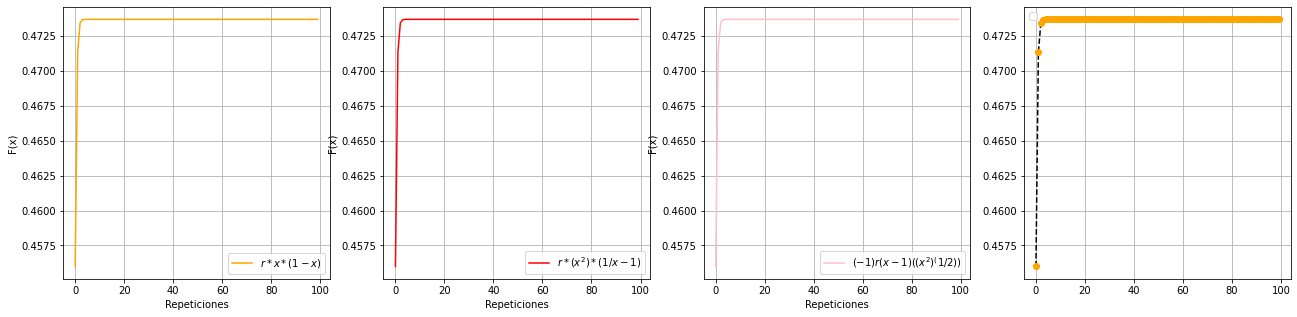

No handles with labels found to put in legend.


None
Para una tasa de crecimiento (r), igual a 2.9, se obtienen las siguientes gràficas: 


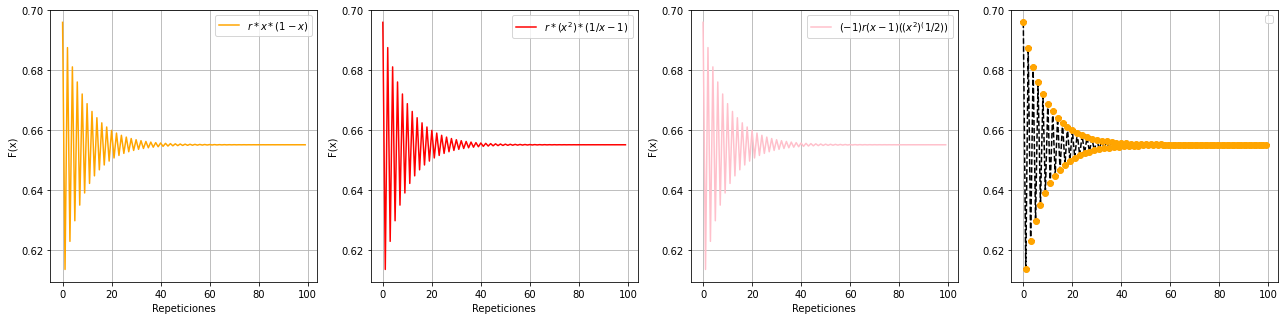

No handles with labels found to put in legend.


None
Para una tasa de crecimiento (r), igual a 3.1, se obtienen las siguientes gràficas: 


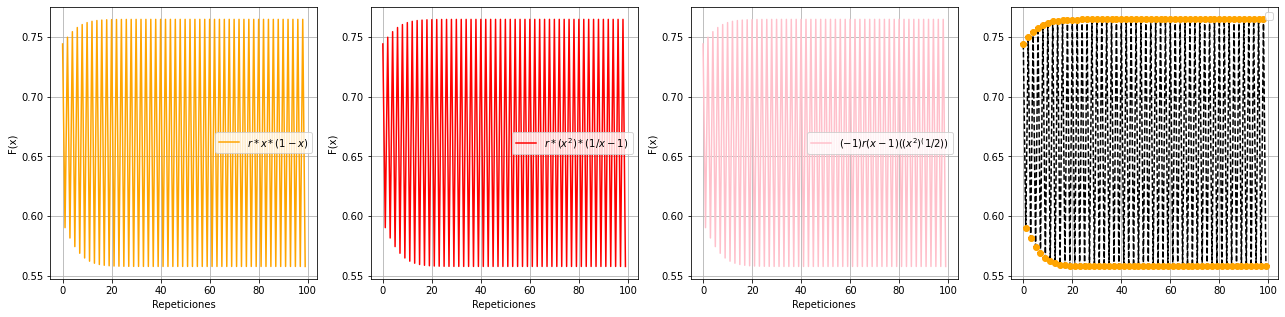

No handles with labels found to put in legend.


None
Para una tasa de crecimiento (r), igual a 3.5, se obtienen las siguientes gràficas: 


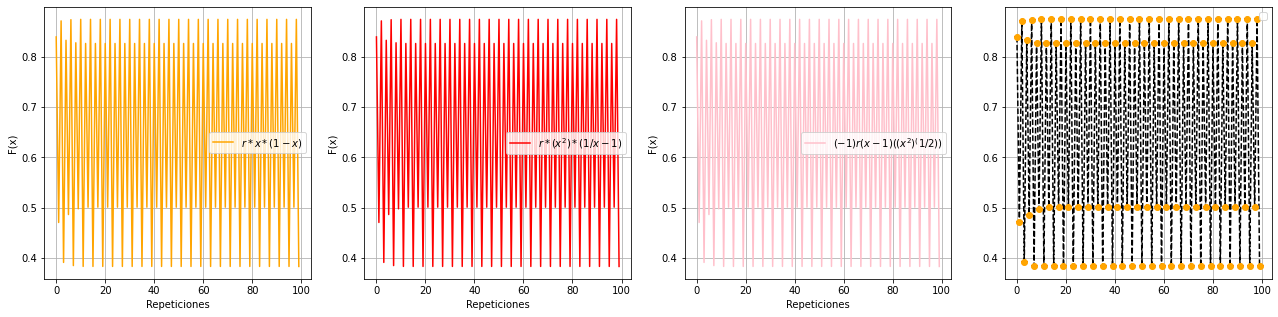

No handles with labels found to put in legend.


None
Para una tasa de crecimiento (r), igual a 3.9, se obtienen las siguientes gràficas: 


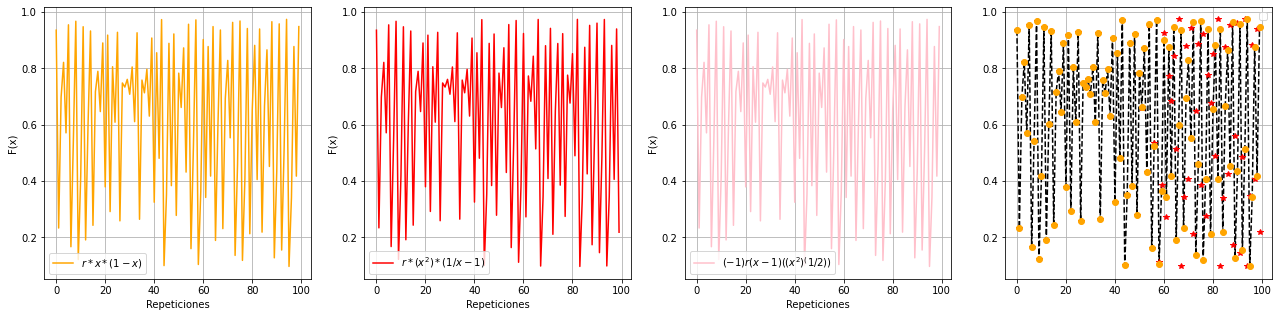

None


In [21]:
lista_tasa = [1.9, 2.9, 3.1, 3.5, 3.9]

def todo(r):
  #Defino algunas variables
  size = 10
  xi = 0.6
  r = r
  repeticiones = 100 
  #Importante crear este arreglo para que no hayan errores por dimensiones mas adelante
  Nrep = np.arange(0, repeticiones, 1)

  #Defino mis funciones con las diferentes formas que encontrè para comparalas con la "original"
  def f1(x, r):#función de población original
    y = r * x * (1-x)
    return y

  def f2(x, r):#función de población dividiendo entre x y luego multiplicando por x
    y = r * (x**2) * (1/x - 1)
    return y

  def f3(x, r):#función de población utilizando raiz
    y = (-1)*np.sqrt(x**2)*r*(x-1)
    return y
  #Creo la funcion para las graficas en n tiempos
  def graficas(xi, r, repeticiones,Funcion):
    f = Funcion
    ejey = np.zeros(repeticiones)
    for i in range(0, repeticiones):
      xn = f(xi, r)
      xi = xn
      ejey[i] = xn
    return ejey 

  #Grafico la funcion 1 
  plt.figure(figsize=(22,5))
  y1 = graficas(xi, r, repeticiones,f1)
  plt.subplot(141)
  plt.xlabel("Repeticiones", fontsize=size)
  plt.ylabel("F(x)")
  plt.grid()
  plt.plot(Nrep, y1, color = 'orange', label = '$r*x*(1-x)$') 
  plt.legend()
  #Grafico la funcion 2
  y2 = graficas(xi, r, repeticiones,f2)
  plt.subplot(142)
  plt.xlabel("Repeticiones", fontsize=size)
  plt.ylabel("F(x)")
  plt.grid()
  plt.plot(Nrep, y2,color = 'red', label = '$r*(x^2)*(1/x - 1)$') 
  plt.legend()
    #Grafico la funcion 3 
  y3 = graficas(xi, r, repeticiones,f3)
  plt.subplot(143)
  plt.xlabel("Repeticiones", fontsize=size)
  plt.ylabel("F(x)")
  plt.grid()
  plt.plot(Nrep, y3,color = 'pink',label = '$(-1)r(x-1)((x^2)^(1/2))$') 
  plt.legend()
    #Grafico una comparativa entre graficas para ver rapida y visualmente algunas variaciones 
  plt.subplot(144)
  plt.plot(Nrep, y1,"--", color = "black")
  plt.plot(Nrep, y2, "*", color = "red")
  plt.plot(Nrep, y3, "o", color = "orange")
  plt.grid()
  plt.legend()

  plt.show()

for i in lista_tasa:
  print("Para una tasa de crecimiento (r), igual a {}, se obtienen las siguientes gràficas: ".format(i))
  print(todo(i))